# Tensorflow Ex-8 Part-3

In [2]:
import pandas as pd

In [3]:
diabetes = pd.read_csv("/content/diabetes.csv")

In [4]:
diabetes.head()

Number_pregnant  Glucose_concentration  Blood_pressure  ...  Age  Class  Group
0                6               0.743719        0.590164  ...   50      1      B
1                1               0.427136        0.540984  ...   31      0      C
2                8               0.919598        0.524590  ...   32      1      B
3                1               0.447236        0.540984  ...   21      0      B
4                0               0.688442        0.327869  ...   33      1      C

[5 rows x 10 columns]

In [5]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [6]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [7]:
diabetes[cols_to_norm]=diabetes[cols_to_norm].apply(lambda x: (x - x.min())/(x.max()-x.min()))

In [8]:
diabetes.head()

Number_pregnant  Glucose_concentration  Blood_pressure  ...  Age  Class  Group
0         0.352941               0.743719        0.590164  ...   50      1      B
1         0.058824               0.427136        0.540984  ...   31      0      C
2         0.470588               0.919598        0.524590  ...   32      1      B
3         0.058824               0.447236        0.540984  ...   21      0      B
4         0.000000               0.688442        0.327869  ...   33      1      C

[5 rows x 10 columns]

In [9]:
import tensorflow as tf

In [10]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [11]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [12]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [13]:
#assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

In [14]:
import matplotlib.pyplot as plt


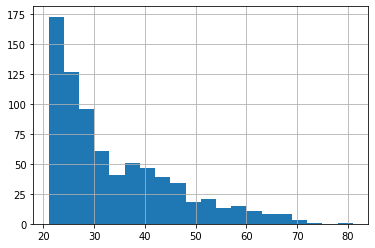

In [15]:
diabetes['Age'].hist(bins=20)

In [16]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [17]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]

In [ ]:
#Train Test Split

In [18]:
x_data = diabetes.drop('Class', axis=1) 
x_data.head()

Number_pregnant  Glucose_concentration  Blood_pressure  ...  Pedigree  Age  Group
0         0.352941               0.743719        0.590164  ...  0.234415   50      B
1         0.058824               0.427136        0.540984  ...  0.116567   31      C
2         0.470588               0.919598        0.524590  ...  0.253629   32      B
3         0.058824               0.447236        0.540984  ...  0.038002   21      B
4         0.000000               0.688442        0.327869  ...  0.943638   33      C

[5 rows x 9 columns]

In [ ]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

In [ ]:
x_train.head()

Number_pregnant  Glucose_concentration  Blood_pressure   Triceps  \
711         0.294118               0.633166        0.639344  0.272727   
58          0.000000               0.733668        0.672131  0.000000   
216         0.294118               0.547739        0.508197  0.414141   
168         0.235294               0.552764        0.540984  0.000000   
658         0.647059               0.638191        0.868852  0.000000   

      Insulin       BMI  Pedigree  Age Group  
711  0.026005  0.441133  0.154142   40     D  
58   0.000000  0.603577  0.727156   44     D  
216  0.152482  0.533532  0.186166   25     B  
168  0.000000  0.475410  0.167805   29     B  
658  0.000000  0.581222  0.047822   51     A